## **Data Preprocessing**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('penguins.csv')

In [3]:
df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [5]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [6]:
df['sex'].replace('.', np.nan, inplace=True)
df.dropna(subset=['sex'], axis = 0, inplace = True)

In [7]:
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
# Encode Sex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

In [9]:
def find_outliers(df): 
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
    return outliers

def print_outliers(df):
    for i in df.columns:
        print(f'Outliers in column {i}: {len(find_outliers(df[i]))}')
        
def handle_outliers(df): 
    for i in df.columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        lower_outliers = np.where(df[i] <= lower_bound)[0]
        upper_outliers = np.where(df[i] >= upper_bound)[0]

        df.drop(index = upper_outliers, inplace = True)
        df.drop(index = lower_outliers, inplace = True)
        df.reset_index(drop=True, inplace=True)
        print(f'Column {i} has been processed')
    
    print('It is done!')
    


handle_outliers(df)

Column culmen_length_mm has been processed
Column culmen_depth_mm has been processed
Column flipper_length_mm has been processed
Column body_mass_g has been processed
Column sex has been processed
It is done!


In [10]:
print_outliers(df)
df.to_csv('penguins_cleaned.csv', index=False)

Outliers in column culmen_length_mm: 0
Outliers in column culmen_depth_mm: 0
Outliers in column flipper_length_mm: 0
Outliers in column body_mass_g: 0
Outliers in column sex: 0


In [11]:
# Encoding for clustering
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
# df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [12]:
# df_scaled.head()

# Hierarchical Clustering

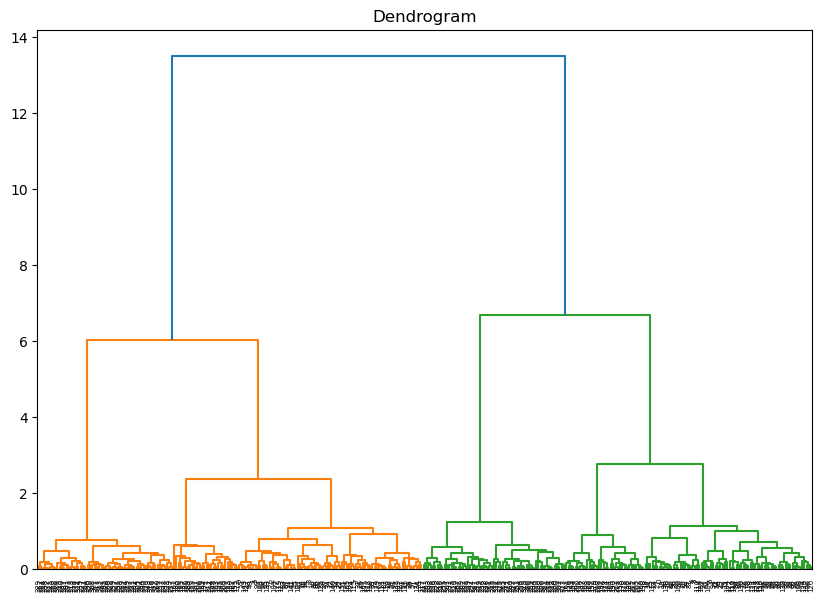

In [13]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')

dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

In [26]:
# Find number of clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
cluster.fit_predict(df_scaled)

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 4, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 1, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 4,
       0, 1, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 3, 2, 3, 2, 2, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2,
       2, 3, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,

In [27]:
cluster.labels_

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 4, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 1, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 4,
       0, 1, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 3, 2, 3, 2, 2, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2,
       2, 3, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,

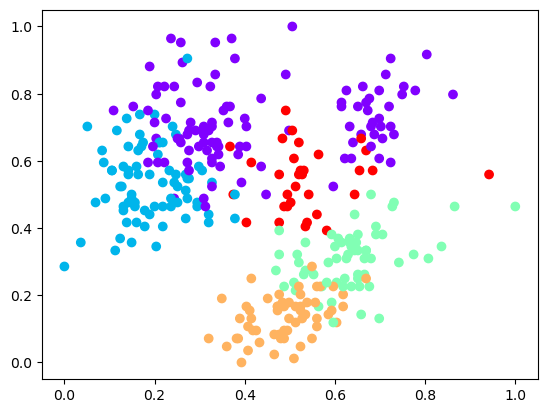

In [28]:
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=cluster.labels_, cmap='rainbow')
